# ***Time Series Forecasting using ARIMA model***



In [ ]:
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from google.colab import files
uploaded = files.upload()

Saving TEST CASE 9.csv to TEST CASE 9.csv


# ***find the order of differencing (d) in ARIMA model***

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.260381
p-value: 0.930931


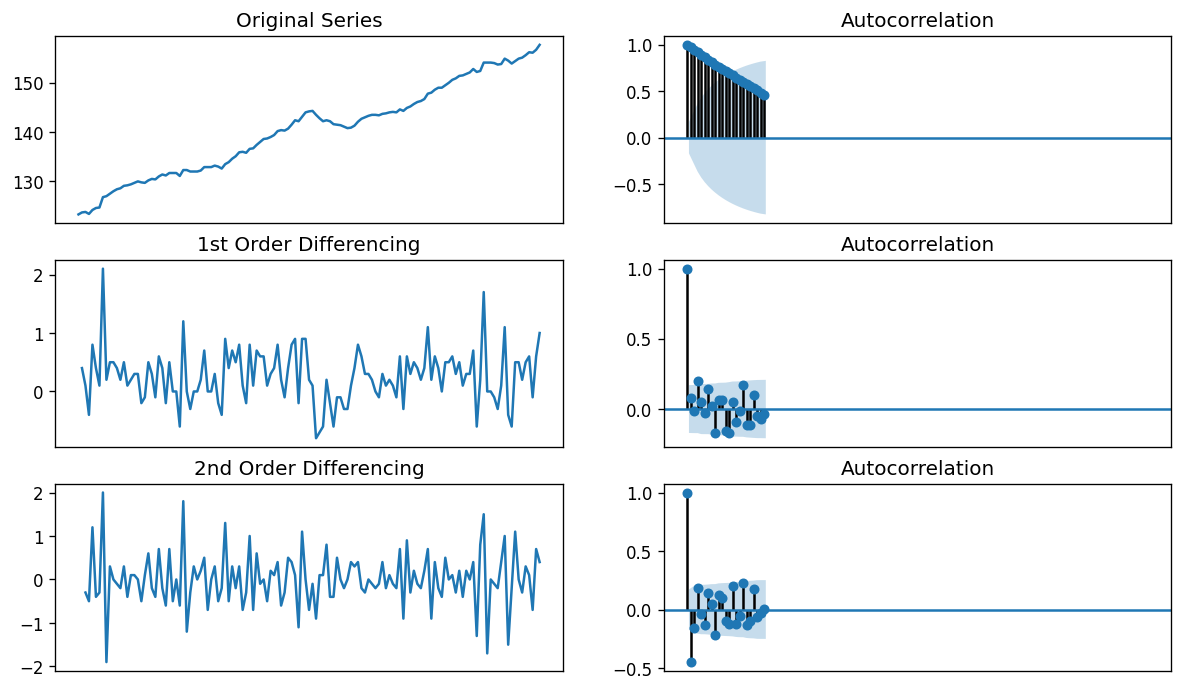

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({ 'figure.figsize':(12,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('TEST CASE 9.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.xticks([])
plt.show()


# ***Finding the order of the AR term (p)***

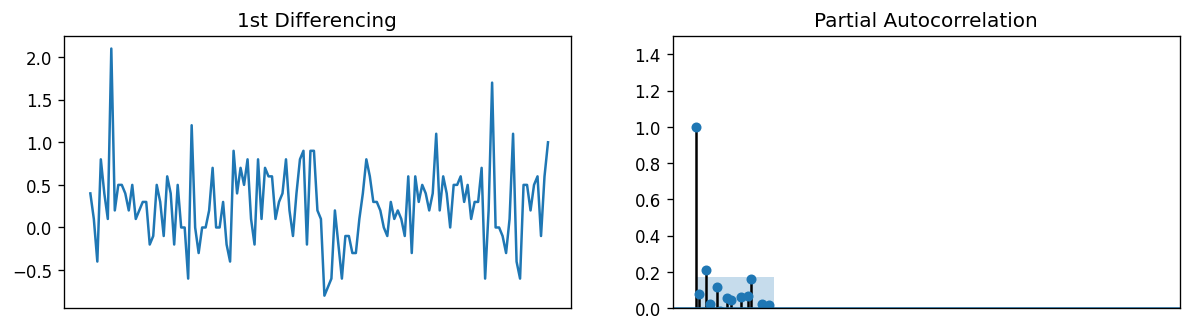

In [ ]:
# PACF plot of 1st differenced series
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal

plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.xticks([])
plt.show()

# ***Finding the order of the MA term (q)***

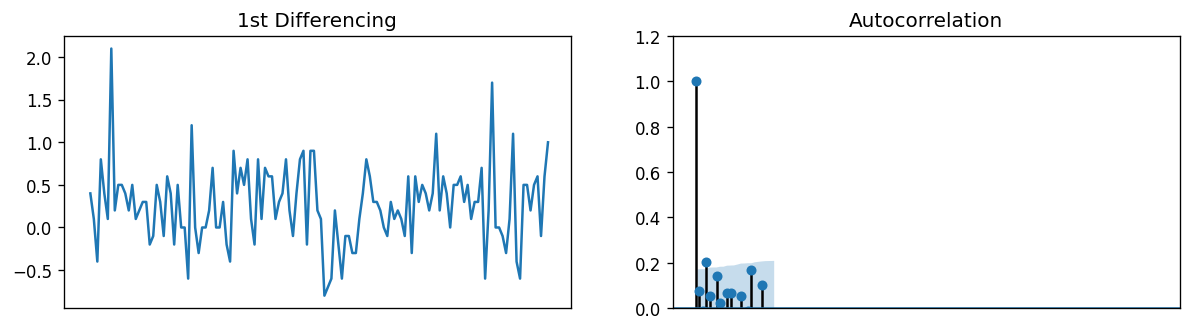

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('TEST CASE 9.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.xticks([])
plt.show()


# ***Differencing in the Time series***

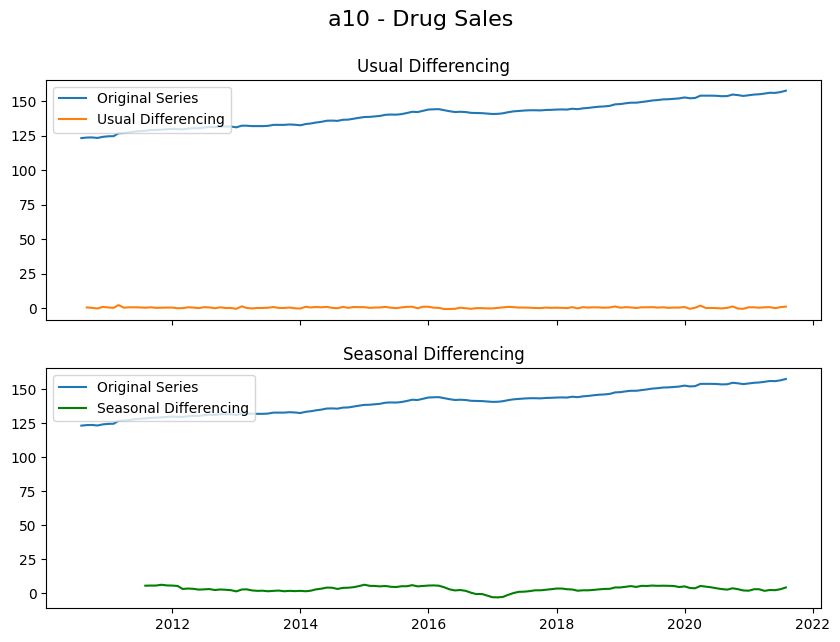

In [ ]:
# Import
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('TEST CASE 9.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,7), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()


# ***Forecasting with the ARIMA model***

***importing the ARMIA model***

In [ ]:
# !pip3 install pyramid-arima
!pip install pmdarima

import pmdarima as pm

data = pd.read_csv('TEST CASE 9.csv', parse_dates=['date'], index_col='date')

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=249.427, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=229.680, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=249.215, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=204.308, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=183.716, Time=1.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=184.668, Time=2.76 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=181.789, Time=0.91 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=202.482, Time=0.22 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=182.969, Time=1.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=229.925, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  133
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                 -86.895
Date:                              Sat, 25 Sep 2021   AIC                            181.789
Time:                                      16:41:05   BIC                            192.939
Sample:                                           0   HQIC                           186.317
                                              - 133                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2712      0.125     -2.172      0.030      -0.516      -0.026
ar.S.L24      -0.3781      0.108     -3.501      0.000      -0.590      -0.166
ma.S.L12      -0.8430      0.215     -3.920      0.000      -1.264      -0.422
sigma2         0.1968      0.029      6.808      0.000       0.140       0.253
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.83   Prob(JB):                         0.22
Heteroskedasticity (H):               1.12   Skew:                             0.12
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***deploying the model***

In [ ]:
# 1,1,1 ARIMA Model
df=pd.read_csv('TEST CASE 9.csv', parse_dates=['date'], index_col='date')
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -80.548
Method:                       css-mle   S.D. of innovations              0.445
Date:                Sat, 25 Sep 2021   AIC                            169.097
Time:                        16:41:57   BIC                            180.628
Sample:                    09-01-2010   HQIC                           173.783
                         - 08-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2610      0.040      6.500      0.000       0.182       0.340
ar.L1.D.value    -0.8875      0.077    -11.558      0.000      -1.038      -0.737
ma.L1.D.value     0.9566      0.048     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

***interpreting residual plots***

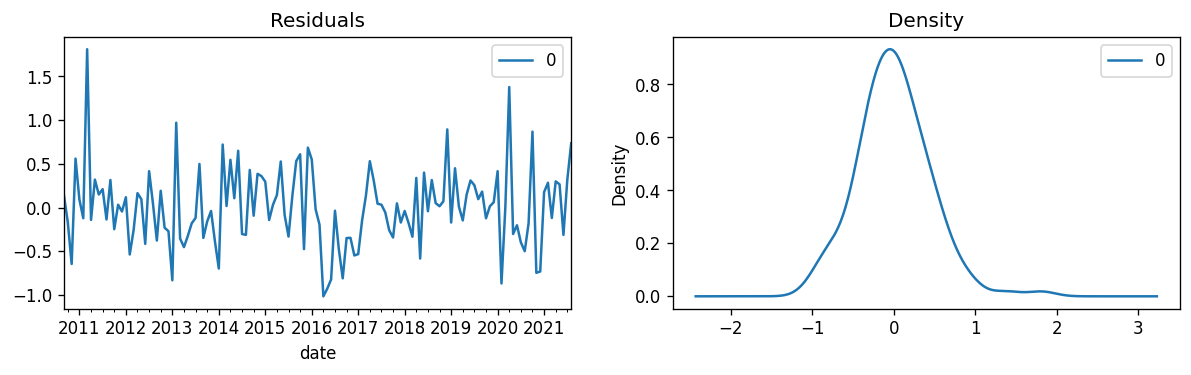

<Figure size 120x120 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.figure(figsize=(1,1))
plt.show()


***Visualing Actual and Forecast values***

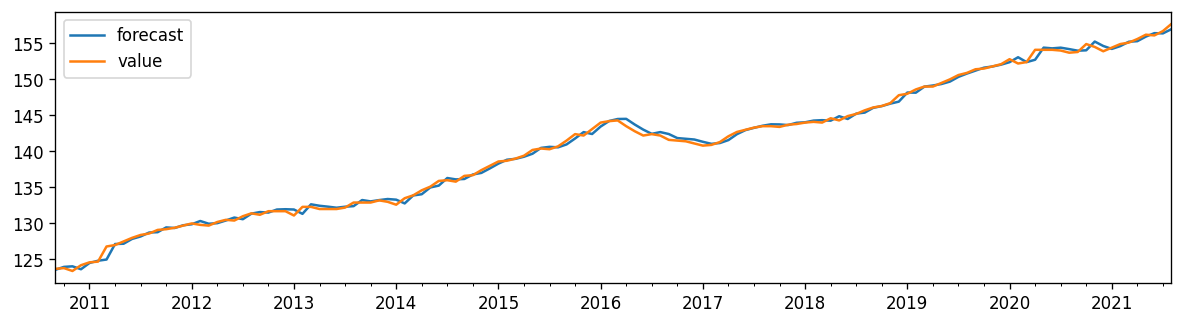

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()


***Forecast for the next 12 months***

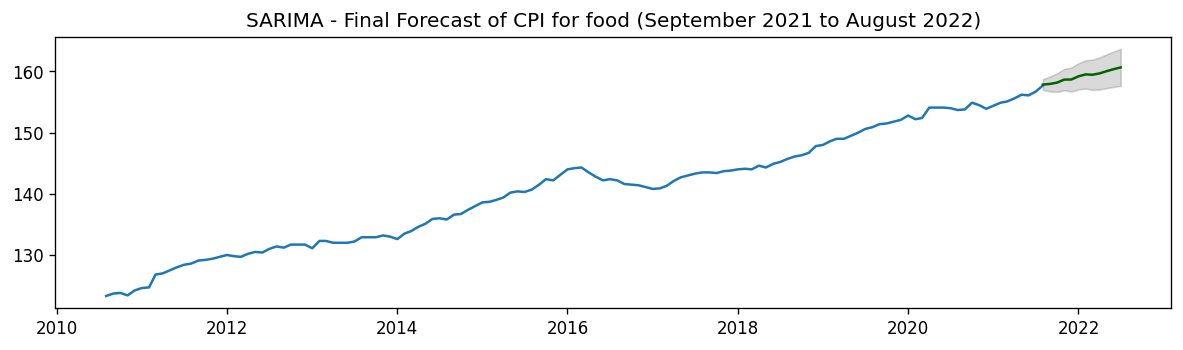

In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of CPI for food (September 2021 to August 2022)")
plt.show()


# ***Building a SARIMAX Model with exogenous variable***

In [ ]:
# Import Data
data = pd.read_csv('TEST CASE 9.csv', parse_dates=['date'], index_col='date')



In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.


In [ ]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=509.900, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=236.446, Time=0.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=653.397, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=255.589, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=208.632, Time=1.56 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.34 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=461.047, Time=0.78 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=210.278, Time=2.39 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=210.277, Time=2.77 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=348.120, Time=1.45 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=204.856, Time=4.17 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=227.41

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  133
Model:             SARIMAX(2, 0, 3)x(2, 1, [], 12)   Log Likelihood                 -92.160
Date:                             Sat, 25 Sep 2021   AIC                            204.320
Time:                                     01:19:43   BIC                            232.278
Sample:                                 08-01-2010   HQIC                           215.675
                                      - 08-01-2021                                         
Covariance Type:                               opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.1925      0.109      1.766      0.077      -0.021       0.406
seasonal_index -2.526e-05   4.91e+04  -5.14e-10      1.000   -9.63e+04    9.63e+04
ar.L1              1.7373      0.188      9.237      0.000       1.369       2.106
ar.L2             -0.7655      0.183     -4.193      0.000      -1.123      -0.408
ma.L1             -0.7880      0.195     -4.043      0.000      -1.170      -0.406
ma.L2             -0.0169      0.126     -0.135      0.893      -0.263       0.229
ma.L3              0.2355      0.105      2.235      0.025       0.029       0.442
ar.S.L12          -0.6971      0.086     -8.119      0.000      -0.865      -0.529
ar.S.L24          -0.5606      0.082     -6.801      0.000      -0.722      -0.399
sigma2             0.2376      0.036      6.596      0.000       0.167       0.308
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.90   Prob(JB):                         0.98
Heteroskedasticity (H):               1.02   Skew:                             0.04
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.28e+14. Standard errors may be unstable.
"""